<a href="https://colab.research.google.com/github/yooon27/Embedded-Software-Contest2023/blob/main/Mnist_basic%20test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
# Define Constants
batch_size = 120 #학습할 때 얼마 단위로 학습을 할 것인
num_classes = 10 #결과를 나타낼 클래스가 몇개인지 (0~9)
epochs = 100 # 학습을 몇번 할 것인지

In [ ]:
#load MNIST data, split between train and test sets
mnist = tf.keras.datasets.mnist #mnist에 60,000개 train data와 10,000개의 test data가 있는 mnist dataset 불러오
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0 #흑백으로 pixel단위의 최소값만 들어있어 1보다 작은 값으로 만드는 것

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [ ]:
#convert class vectors to binary class matrics (one-hot)
#10개의 클래스 구조를 가지고있는 onehot 구조로 바뀌게 된다 (y_train, y_test를 클래스로 바꿈)
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#Build the tf.keras.Sequential model by stacking lyaers (설계도를 만드는 과정)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation = 'softmax')
])

model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Save the best model as digits_model.h5 (학습 내용들을 checkpoint라는 이름의 파일에 넣음)
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digit_model.h5',save_best_only=True)

#Define a callback to monitor val_loss(overfitting을 방지_loss값이 보합이 될때 이상의 학습은 의미 없다고 판단 )
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience=5)


In [ ]:
#Train the model using the early stopping callback
history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test),
                    epochs=epochs,
                    batch_size = batch_size,
                    callbacks=[monitor_val_lose, modelCheckpoint])

Epoch 1/100
500/500 [==============================] - 7s 4ms/step - loss: 0.3928 - accuracy: 0.8876 - val_loss: 0.1872 - val_accuracy: 0.9454
Epoch 2/100
500/500 [==============================] - 2s 3ms/step - loss: 0.1878 - accuracy: 0.9460 - val_loss: 0.1359 - val_accuracy: 0.9586
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 0.1423 - accuracy: 0.9584 - val_loss: 0.1093 - val_accuracy: 0.9685
Epoch 4/100
500/500 [==============================] - 2s 5ms/step - loss: 0.1153 - accuracy: 0.9652 - val_loss: 0.0958 - val_accuracy: 0.9724
Epoch 5/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0983 - accuracy: 0.9707 - val_loss: 0.0845 - val_accuracy: 0.9747
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0858 - accuracy: 0.9746 - val_loss: 0.0801 - val_accuracy: 0.9752
Epoch 7/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0758 - accuracy: 0.9768 - val_loss: 0.0742 - val_accuracy: 0.9773

313/313 - 1s - loss: 0.0674 - accuracy: 0.9802 - 726ms/epoch - 2ms/step


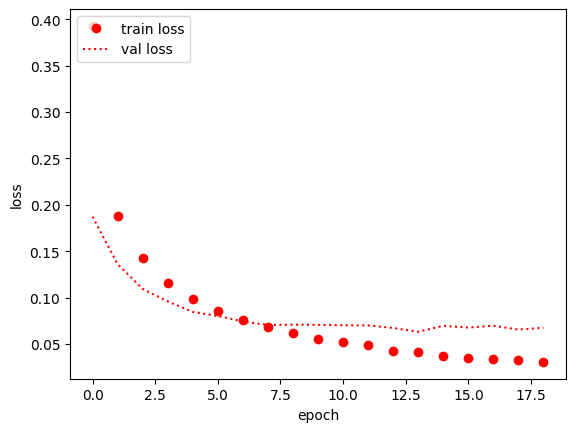

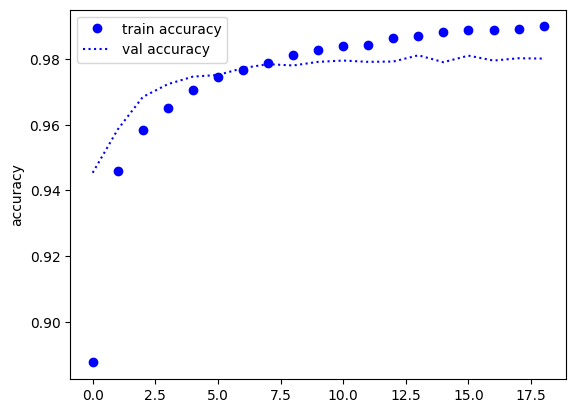

In [ ]:
#show History
model.evaluate(x_test, y_test, verbose=2)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'],'ro',label='train loss')
loss_ax.plot(history.history['val_loss'],'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
#Predict Model (모델 평가)
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number) #onehot 구조로 나옴
print(y_test_digit, y_test_number)

1/1 [==============================] - 0s 79ms/step
[[6.3929740e-08 1.5703056e-09 1.8286054e-08 1.1143921e-05 6.2270480e-13
  5.6780061e-09 1.4691313e-13 9.9998856e-01 2.0065919e-08 2.4091378e-07]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[6.392974e-08, 1.5703056e-09, 1.8286054e-08, 1.1143921e-05, 6.227048e-13, 5.678006e-09, 1.4691313e-13, 0.99998856, 2.0065919e-08, 2.4091378e-07]


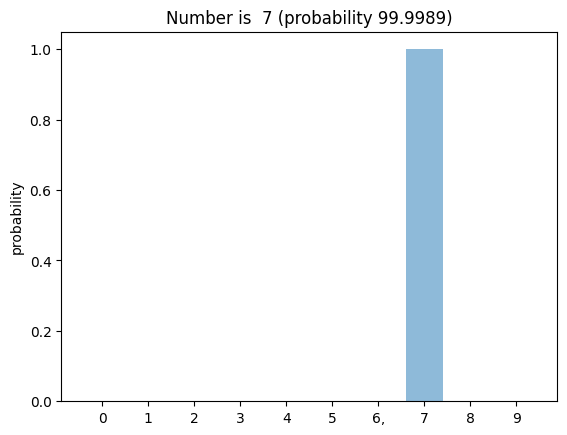

In [ ]:
#Show Predicted Number
digits = ('0', '1', '2','3','4','5','6,','7','8','9')
y_pos = np.arange(len(digits))
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)'% (result_number, result_probability*100))

plt.show()

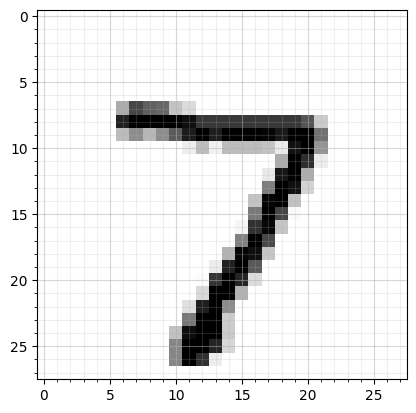

In [ ]:
#Draw digit image
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

#Major ticks every 20 minor ticks every 5
major_ticks = np.arange(0, 29, 5)
minor_ticks = np.arange(0,29,1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

#And a corresponding grid
ax.grid(which='both')

#Or if you want different setting for the grids:
ax.grid(which='minor', alpha = 0.2)
ax.grid(which='major', alpha = 0.5)

ax.imshow(x_test[selected_digit],cmap=plt.cm.binary)

plt.show()

In [ ]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model.save('')